# Logistic Regression to predict probabilities

In [1]:
'''
    ------------------------------------------------------------------------------------------------------
    The logistic regression uses a sigmoid function to map the output to a probability between 0 and 1.
    ------------------------------------------------------------------------------------------------------
    It is given by the formula: f(x) = 1 / (1 + exp(-x))
    ------------------------------------------------------------------------------------------------------
    This is pretty useful because it allows us to interpret the output of the model as a probability. Also the cost function simplifies to the negative log likelihood.
    ------------------------------------------------------------------------------------------------------
'''

'\n    ------------------------------------------------------------------------------------------------------\n    The logistic regression uses a sigmoid function to map the output to a probability between 0 and 1.\n    ------------------------------------------------------------------------------------------------------\n    It is given by the formula: f(x) = 1 / (1 + exp(-x))\n    ------------------------------------------------------------------------------------------------------\n    This is pretty useful because it allows us to interpret the output of the model as a probability. Also the cost function simplifies to the negative log likelihood.\n    ------------------------------------------------------------------------------------------------------\n'

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [31]:
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

data = pd.concat([X, y], axis=1)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

X.columns = iris.feature_names

In [34]:
iris_corr = data.corr()
iris_corr['target'].sort_values(ascending=False)

target          1.000000
petal_width     0.956547
petal_length    0.949035
sepal_length    0.782561
sepal_width    -0.426658
Name: target, dtype: float64

array([[<Axes: xlabel='petal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>],
       [<Axes: xlabel='petal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>],
       [<Axes: xlabel='petal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='petal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>]], dtype=object)

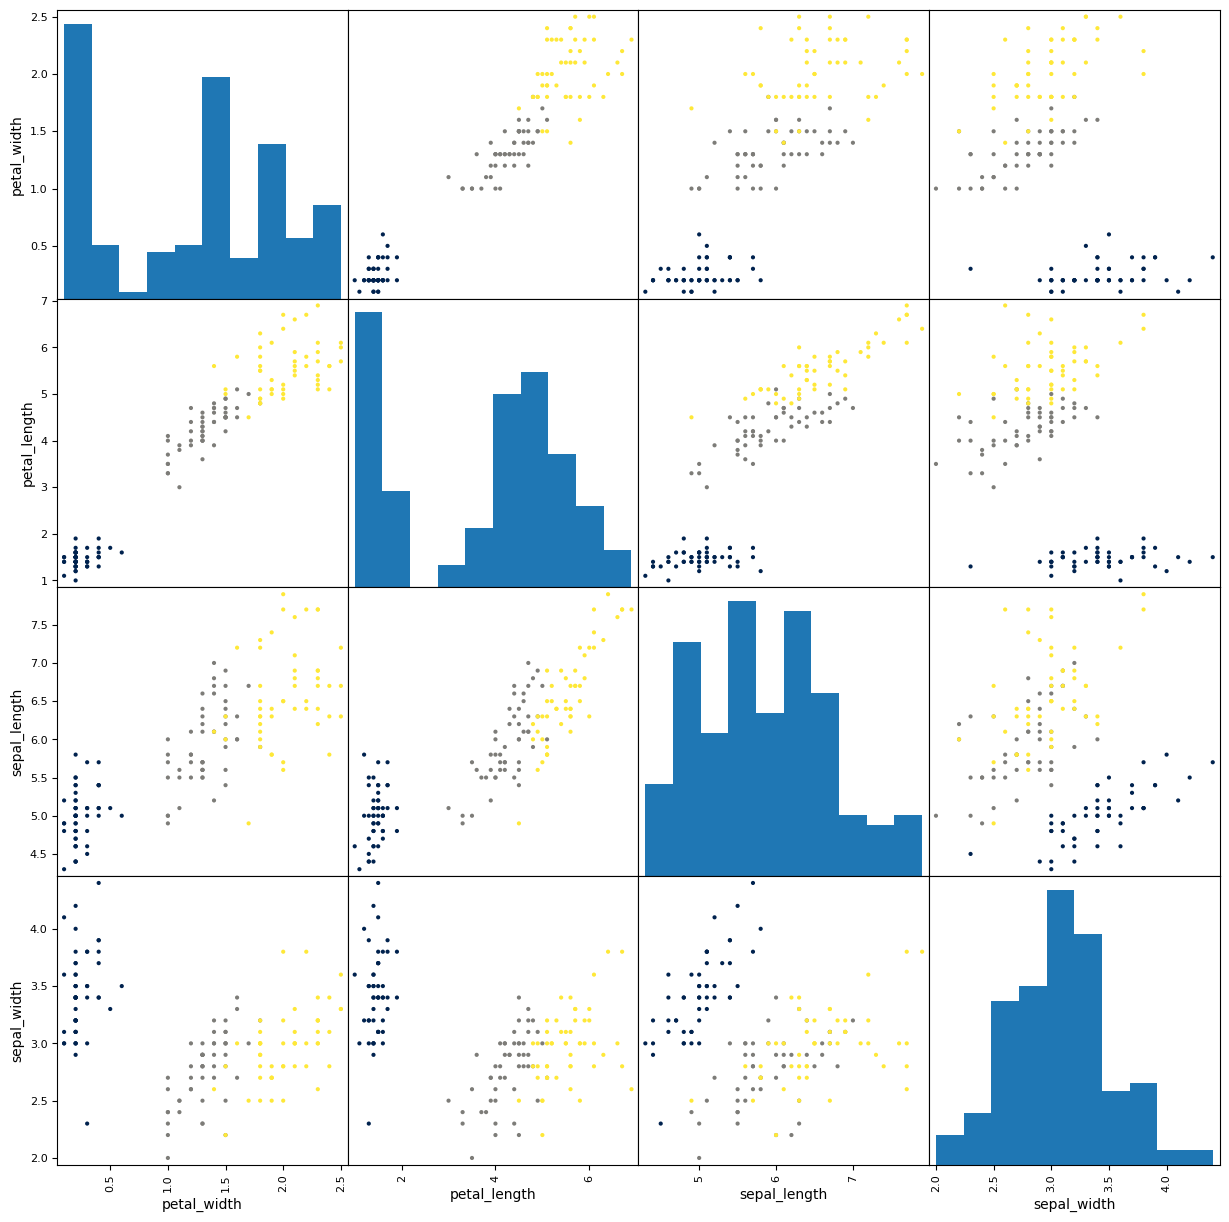

In [47]:
from pandas.plotting import scatter_matrix

attributes = ['petal_width', 'petal_length', 'sepal_length', 'sepal_width']
scatter_matrix(data[attributes], figsize=(15, 15), alpha=1, c=data['target'], cmap='cividis')

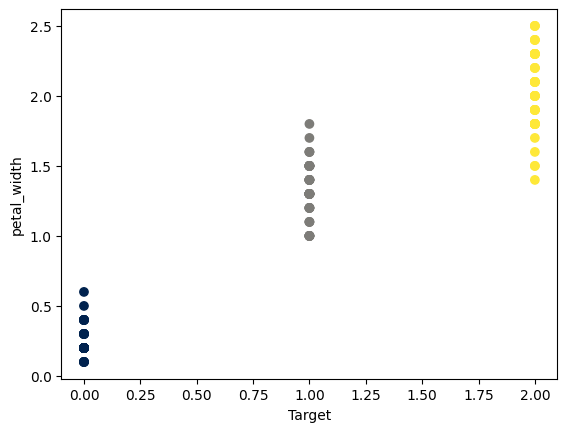

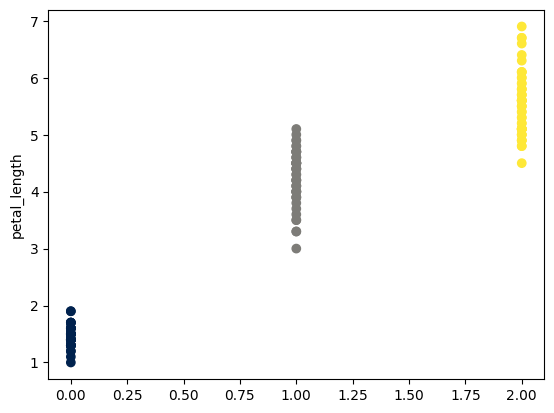

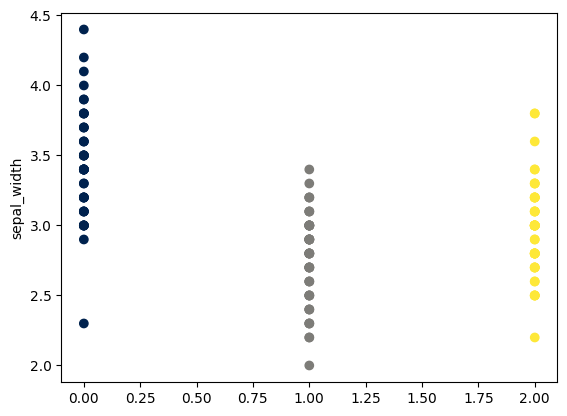

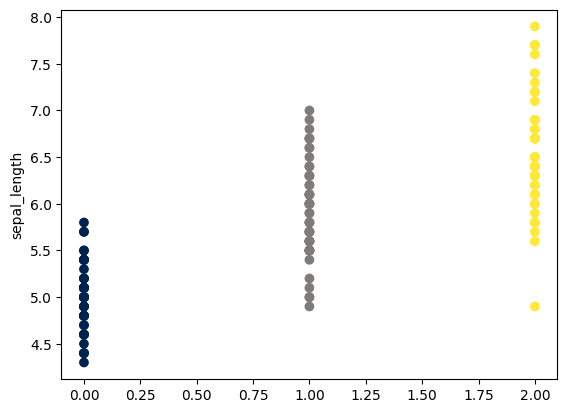

In [48]:
plt.xlabel('Target')
plt.scatter(data['target'], data['petal_width'], c=data['target'], cmap='cividis')
plt.ylabel('petal_width')
plt.show()
plt.scatter(data['target'], data['petal_length'], c=data['target'], cmap='cividis')
plt.ylabel('petal_length')
plt.show()
plt.scatter(data['target'], data['sepal_width'], c=data['target'], cmap='cividis')
plt.ylabel('sepal_width')
plt.show()
plt.scatter(data['target'], data['sepal_length'], c=data['target'], cmap='cividis')
plt.ylabel('sepal_length')
plt.show()

In [52]:
X = data['petal_width']
y = data['target']

from sklearn.linear_model import LogisticRegression

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
y = (y == 2).astype(np.int64)

log_reg = LogisticRegression()
log_reg.fit(X, y.ravel())

print(log_reg.intercept_, log_reg.coef_)

[-7.19342106] [[4.33251974]]


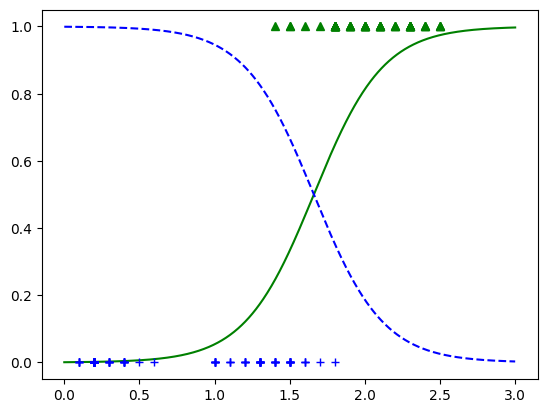

In [69]:
# Plotting the curves

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-virginica')
for x_, y_ in (zip(X, y)):
    if (y_ == True):
        plt.plot(x_, y_, 'g^')
    else:
        plt.plot(x_, y_, 'b+')

In [133]:
X = data.drop(['sepal_length', 'sepal_width', 'target'], axis=1)
X = X.values
y = (data['target'] == 2).astype(np.int64).values.reshape(-1, 1)

data.min()

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
target          0.0
dtype: float64

In [134]:
log_reg.fit(X, y.ravel())
print(log_reg.intercept_, log_reg.coef_)

[-17.55616979] [[2.77983942 2.38388751]]


In [135]:
X1_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X2_new = np.linspace(1, 7, 1000).reshape(-1, 1)

y_proba = log_reg.predict_proba(np.c_[X1_new, X2_new])

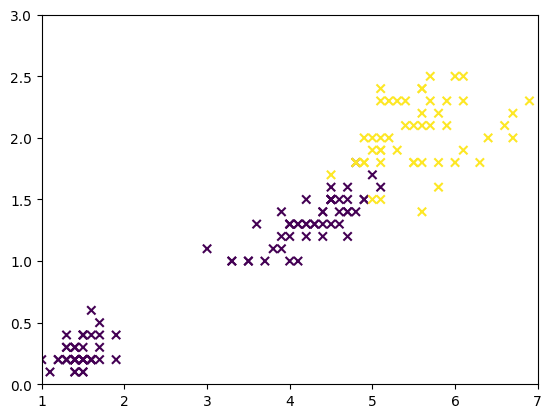

In [138]:
plt.axis([1, 7, 0, 3])

plt.scatter(X[:, 0], X[:, 1] , c=y[:, 0], cmap='viridis', marker='x')

#TODO: Plot decision boundaries

# Softmax Regression

In [156]:
X = data.values[:, 2:4]
y = data['target'].values

In [157]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')